In [1]:
import sys
from os.path import exists
import gzip
import logging
import time
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
sys.path.append("../..")
#pd.set_option('display.precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
#from discovery_bu_multidim import bu_discovery_multidim
from sample_multidim import MultidimSample

In [2]:
#Logger Configuration:
LOG_FORMAT = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
LOGGER = logging.getLogger(__name__)
LOGGER.setLevel('INFO')
FILE_HANDLER = logging.StreamHandler()
FORMATTER = logging.Formatter(LOG_FORMAT)
FILE_HANDLER.setFormatter(FORMATTER)
LOGGER.addHandler(FILE_HANDLER)

### Sample 1

Pattern SEQ(Task a, Task b, Task c)

Where a.status = c.status = 1 And b.status = 5

And a.job = b.job And a.job = c.job

And a.machine = b.machine

And a.machine = c.machine

Within 1000 seconds

In [3]:
LOGGER.info('Started file 1a')
file = gzip.open('google_query1a.txt.gz', 'rb')
counter = 0
start= time.time()
sample_sets1 = []
for trace1 in file:
    counter+=1
    sample_sets1.append(' '.join(trace1.decode().split()))


file.close()
result = time.time() - start
LOGGER.info('Finished reading file 1: %i lines in %f seconds', counter, result)

2023-02-13 11:27:38,818 - __main__ - INFO - Started file 1a
2023-02-13 11:27:39,488 - __main__ - INFO - Finished reading file 1: 4265 lines in 0.658335 seconds


In [12]:
LOGGER.info('Started file 1')
file = gzip.open('google_query1.txt.gz', 'rb')
counter = 0
start= time.time()
sample_sets0 = []
for trace1 in file:
    counter+=1
    sample_sets0.append(' '.join(trace1.decode().split()))


file.close()
result = time.time() - start
LOGGER.info('Finished reading file 1: %i lines in %f seconds', counter, result)

2023-02-13 16:58:33,573 - __main__ - INFO - Started file 1
2023-02-13 16:58:33,653 - __main__ - INFO - Finished reading file 1: 533 lines in 0.076584 seconds


In [4]:
trace_length_dict=[]
for trace in sample_sets1:
    trace_length_dict.append(trace.count(' ')+1)
LOGGER.info('Average Trace length of sample 1a: %f', sum(trace_length_dict)/len(trace_length_dict))

2023-02-13 11:27:58,229 - __main__ - INFO - Average Trace length of sample 1a: 1001.000000


In [13]:
trace_length_dict=[]
for trace in sample_sets0:
    trace_length_dict.append(trace.count(' ')+1)
LOGGER.info('Average Trace length of sample 1: %f', sum(trace_length_dict)/len(trace_length_dict))

2023-02-13 16:58:41,472 - __main__ - INFO - Average Trace length of sample 1: 807.795497


In [5]:
att_typeset = {key: {} for key in range(6)}
dim_sets = {key: set() for key in range(6)}
dom_trace_dict = {key: {} for key in range(6)}
for trace_id, trace in enumerate(sample_sets1):
    # if trace_id in df1.index:
    # print(trace_id)
    dim_sets_new = {key: set() for key in range(6)}
    for dom in dom_trace_dict.keys():
        dom_trace_dict[dom][trace_id]={} 
    for event in trace.split():
        for dom, letter in enumerate(event.split(';')[:-1]):
            if letter in att_typeset[dom]:
                att_typeset[dom][letter].add(trace_id)
            else:
                att_typeset[dom][letter] = set()
                att_typeset[dom][letter].add(trace_id)
                
            if letter in dom_trace_dict[dom][trace_id]:
                dom_trace_dict[dom][trace_id][letter] +=1
            else:
                dom_trace_dict[dom][trace_id][letter] =1
            dim_sets_new[dom].add(letter)
                
    if trace_id != 0:
        for i in  dim_sets.keys():
            dim_sets[i] = dim_sets[i] & dim_sets_new[i]
            
    else:
        for i in  dim_sets.keys():
            dim_sets[i] = dim_sets_new[i]



In [16]:
att_typeset = {key: {} for key in range(6)}
dim_sets = {key: set() for key in range(6)}
dom_trace_dict = {key: {} for key in range(6)}
for trace_id, trace in enumerate(sample_sets0):
    # if trace_id in df1.index:
    # print(trace_id)
    dim_sets_new = {key: set() for key in range(6)}
    for dom in dom_trace_dict.keys():
        dom_trace_dict[dom][trace_id]={} 
    for event in trace.split():
        for dom, letter in enumerate(event.split(';')[:-1]):
            if letter in att_typeset[dom]:
                att_typeset[dom][letter].add(trace_id)
            else:
                att_typeset[dom][letter] = set()
                att_typeset[dom][letter].add(trace_id)
                
            if letter in dom_trace_dict[dom][trace_id]:
                dom_trace_dict[dom][trace_id][letter] +=1
            else:
                dom_trace_dict[dom][trace_id][letter] =1
            dim_sets_new[dom].add(letter)
                
    if trace_id != 0:
        for i in  dim_sets.keys():
            dim_sets[i] = dim_sets[i] & dim_sets_new[i]
            
    else:
        for i in  dim_sets.keys():
            dim_sets[i] = dim_sets_new[i]


#### Type or Status

In [6]:

df1_dict = pd.DataFrame(dom_trace_dict[2].items())
df1_dict2 = pd.json_normalize(df1_dict[1])
df1_dict2 = df1_dict2.reindex(sorted(df1_dict2.columns), axis=1)
df1_dict2.to_csv('query1a_status.csv')

#df1_dict2.fillna(0.0001,inplace=True)
df1_dict2.describe()

0        1        2        3        4        5      7       8
count 4265.000 4265.000 4242.000 4130.000 3899.000 4265.000 62.000 264.000
mean   270.153  364.037   78.404   13.371  152.274  136.147  1.000   8.280
std    106.995  113.047   70.558   32.107  125.164  112.327  0.000   6.602
min      1.000    7.000    1.000    1.000    1.000    1.000  1.000   1.000
25%    195.000  312.000   26.000    3.000   61.000   58.000  1.000   1.000
50%    268.000  362.000   59.000    7.000  124.000  105.000  1.000   9.000
75%    333.000  419.000  114.000   14.000  209.000  186.000  1.000  17.000
max    978.000  997.000  408.000  381.000  953.000  903.000  1.000  17.000

count zeigt an welche types den Support erfüllen. Hier: 1,2,3,4,5 für supp = 1.0

In [15]:

df1_dict = pd.DataFrame(dom_trace_dict[2].items())
df1_dict2 = pd.json_normalize(df1_dict[1])
df1_dict2 = df1_dict2.reindex(sorted(df1_dict2.columns), axis=1)
df1_dict2.to_csv('query1a_status.csv')

#df1_dict2.fillna(0.0001,inplace=True)
df1_dict2.describe()

0       1       2       3       4       5      8
count 533.000 533.000 516.000 438.000 468.000 533.000 10.000
mean  278.456 246.878  90.391  19.292 107.402  84.608 10.000
std   203.844 170.136  99.591  54.638 130.960  70.718  0.000
min     7.000   6.000   3.000   1.000   1.000   2.000 10.000
25%   131.000 123.000  12.000   4.000  20.000  39.000 10.000
50%   233.000 202.000  52.000   7.000  62.000  74.000 10.000
75%   367.000 355.000 131.250  12.000 143.250 112.000 10.000
max   942.000 921.000 428.000 395.000 799.000 900.000 10.000

In [17]:

df1_dict = pd.DataFrame(dom_trace_dict[3].items())
df1_dict2 = pd.json_normalize(df1_dict[1])
df1_dict2 = df1_dict2.reindex(sorted(df1_dict2.columns), axis=1)
df1_dict2.to_csv('query1a_status.csv')

#df1_dict2.fillna(0.0001,inplace=True)
df1_dict2.describe()

0       1     10     11       2       4       6       8       9
count 533.000 514.000 99.000 10.000 427.000 255.000 195.000 388.000 425.000
mean  399.553 113.593  3.020  2.200 181.028 217.698  16.749  11.247  43.395
std   221.240 186.493  0.654  0.422 236.393 183.045  17.752  22.605  56.890
min    18.000   1.000  1.000  2.000   1.000   1.000   1.000   1.000   1.000
25%   207.000  10.000  3.000  2.000   5.000 100.500   4.000   2.000  11.000
50%   350.000  28.000  3.000  2.000  87.000 153.000   9.000   4.000  21.000
75%   600.000 134.000  3.000  2.000 253.000 280.500  26.500  10.000  37.000
max   977.000 897.000  9.000  3.000 977.000 846.000  89.000 158.000 281.000

### Sample 2

Pattern SEQ(Task a, Task b, Task c, Task d)

Where a.machine=b.machine

And a.machine=c.machine

And a.machine=d.machine

And a.status=4 And b.status=4

And c.status=4 And d.status=4

Within 100 minutes

In [7]:
LOGGER.info('Started file 2')
file = gzip.open('google_query2.txt.gz', 'rb')
counter = 0
start= time.time()
sample_sets = []
for trace1 in file:
    counter+=1
    sample_sets.append(' '.join(trace1.decode().split()))


file.close()
result = time.time() - start
LOGGER.info('Finished reading file 2: %i lines in %f seconds', counter, result)

2022-12-05 10:09:46,766 - __main__ - INFO - Started file 2
2022-12-05 10:09:46,881 - __main__ - INFO - Finished reading file 2: 240 lines in 0.112395 seconds


In [8]:
trace_length_dict=[]
for trace in sample_sets:
    trace_length_dict.append(trace.count(' ')+1)
LOGGER.info('Average Trace length of sample 2: %f', sum(trace_length_dict)/len(trace_length_dict))

2022-12-05 10:09:51,772 - __main__ - INFO - Average Trace length of sample 2: 1001.000000


In [9]:
len(sample_sets)

240

In [10]:

att_typeset = {key: {} for key in range(5)}
dim_sets = {key: set() for key in range(5)}
dom_trace_dict = {key: {} for key in range(5)}
for trace_id, trace in enumerate(sample_sets):
    #print(trace_id)
    dim_sets_new = {key: set() for key in range(5)}
    for dom in dom_trace_dict.keys():
        dom_trace_dict[dom][trace_id]={} 
    for event in trace.split():
        for dom, letter in enumerate(event.split(';')[:-1]):
            if letter in att_typeset[dom]:
                att_typeset[dom][letter].add(trace_id)
            else:
                att_typeset[dom][letter] = set()
                att_typeset[dom][letter].add(trace_id)
                
            if letter in dom_trace_dict[dom][trace_id]:
                dom_trace_dict[dom][trace_id][letter] +=1
            else:
                dom_trace_dict[dom][trace_id][letter] =1
            dim_sets_new[dom].add(letter)
                
    if trace_id != 0:
        for i in  dim_sets.keys():
            dim_sets[i] = dim_sets[i] & dim_sets_new[i]
            
    else:
        for i in  dim_sets.keys():
            dim_sets[i] = dim_sets_new[i]

#### Dimension 4: Type or Status

In [11]:

df1_dict = pd.DataFrame(dom_trace_dict[2].items())
df1_dict2 = pd.json_normalize(df1_dict[1])
df1_dict2 = df1_dict2.reindex(sorted(df1_dict2.columns), axis=1)
df1_dict2.to_csv('query2_status.csv')

df1_dict2.describe()

0       1       2       3       4       5      8
count 240.000 198.000 192.000 239.000 240.000 212.000  5.000
mean  247.775 291.025  23.203 154.874 282.146  65.717  6.800
std   171.552 214.646  32.386 194.577 259.604  88.113  1.789
min     4.000   1.000   1.000   1.000  12.000   1.000  6.000
25%    95.500 118.250   6.000   8.500  69.750   5.000  6.000
50%   199.500 297.000  11.000  20.000 185.500  34.000  6.000
75%   440.000 435.250  26.250 399.000 418.250  94.250  6.000
max   600.000 966.000 185.000 489.000 911.000 511.000 10.000

### Sample 3

Pattern SEQ(Task a, Task b, Task c)

Where a.machine=b.machine And a.job=c.job

And a.status=1 And b.status=1 And c.status=2

Within 100 seconds

In [13]:
LOGGER.info('Started file 3')
file = gzip.open('google_query3.txt.gz', 'rb')
counter = 0
start= time.time()
sample_sets = []
for trace1 in file:
    counter+=1
    sample_sets.append(' '.join(trace1.decode().split()))


file.close()
result = time.time() - start
LOGGER.info('Finished reading file 3: %i lines in %f seconds', counter, result)

2022-12-05 11:26:16,108 - __main__ - INFO - Started file 3


EOFError: Compressed file ended before the end-of-stream marker was reached

In [14]:
trace_length_dict=[]
for trace in sample_sets:
    trace_length_dict.append(trace.count(' ')+1)
LOGGER.info('Average Trace length of sample 3: %f', sum(trace_length_dict)/len(trace_length_dict))

2022-12-05 11:26:20,636 - __main__ - INFO - Average Trace length of sample 3: 1000.321470


In [16]:

att_typeset = {key: {} for key in range(5)}
dim_sets = {key: set() for key in range(5)}
dom_trace_dict = {key: {} for key in range(5)}
for trace_id, trace in enumerate(sample_sets):
    # print(trace_id)
    dim_sets_new = {key: set() for key in range(5)}
    for dom in dom_trace_dict.keys():
        dom_trace_dict[dom][trace_id]={} 
    for event in trace.split():
        for dom, letter in enumerate(event.split(';')[:-1]):
            if letter in att_typeset[dom]:
                att_typeset[dom][letter].add(trace_id)
            else:
                att_typeset[dom][letter] = set()
                att_typeset[dom][letter].add(trace_id)
                
            if letter in dom_trace_dict[dom][trace_id]:
                dom_trace_dict[dom][trace_id][letter] +=1
            else:
                dom_trace_dict[dom][trace_id][letter] =1
            dim_sets_new[dom].add(letter)
                
    if trace_id != 0:
        for i in  dim_sets.keys():
            dim_sets[i] = dim_sets[i] & dim_sets_new[i]
            
    else:
        for i in  dim_sets.keys():
            dim_sets[i] = dim_sets_new[i]

#### Dimension 4: Type or Status

In [18]:

df1_dict = pd.DataFrame(dom_trace_dict[3].items())
df1_dict2 = pd.json_normalize(df1_dict[1])
df1_dict2 = df1_dict2.reindex(sorted(df1_dict2.columns), axis=1)
df1_dict2.to_csv('query3_status.csv')

df1_dict2.describe()

0        1      10     11        2        8        9
count 3428.000 2155.000 469.000 17.000 3428.000 1095.000 2084.000
mean   694.474   70.473   2.431  1.941  256.178    3.584    6.381
std    225.579  105.087   0.826  0.899  224.650    8.060    9.785
min      1.000    1.000   1.000  1.000    7.000    1.000    1.000
25%    692.000    1.000   2.000  1.000  170.000    1.000    1.000
50%    795.000    9.000   3.000  2.000  198.000    1.000    2.000
75%    824.000  111.000   3.000  3.000  235.000    4.000    5.000
max    994.000  385.000   5.000  3.000 1000.000  108.000   57.000

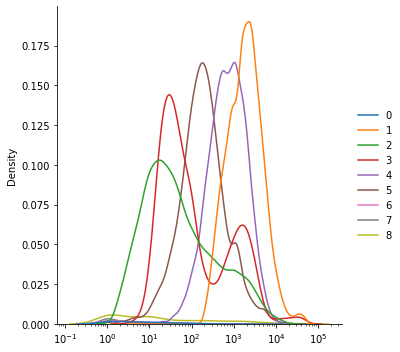

In [64]:
sbn.displot(df1_dict2,  log_scale=True,kind='kde')

In [65]:
df1_dict2.loc[df1_dict2['1'].notna() == False]

0   1  2     3    4       5   6   7   8
5206 NaN NaN  4   436  707   6.000 NaN NaN NaN
6972 NaN NaN  2  2200  361 579.000 NaN NaN NaN